Eliminating discrepancies with the first notebook

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

In [2]:
# Import MAB library
sys.path.insert(0, '../mab/') 
%load_ext autoreload
%autoreload 2
from policies import *
from models import *
from utils import better_truncnorm
from run import *

In [3]:
np.random.seed(1234)
mab = NonStationaryTruncatedGaussianMAB([(0.5,0.1)]*10)

In [4]:
means = []
rewards = []
mab.reset()
for _ in range(1000):
  rewards += [mab.draw(a=0)]
  means += [mab.means.copy()]
  mab.update()
means = np.array(means)
rewards = np.array(rewards)

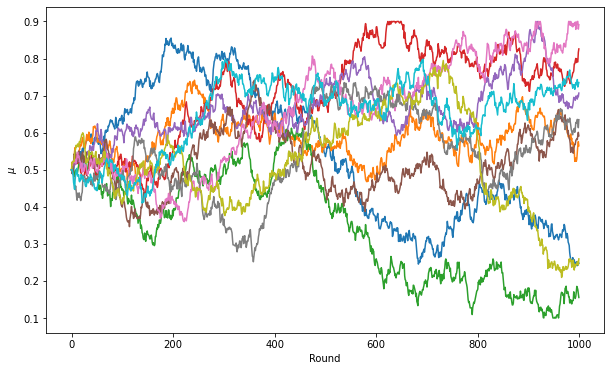

In [5]:
plt.figure(figsize=(10,6))
plt.plot(means)
plt.ylabel("$\mu$")
plt.xlabel("Round")
plt.show()

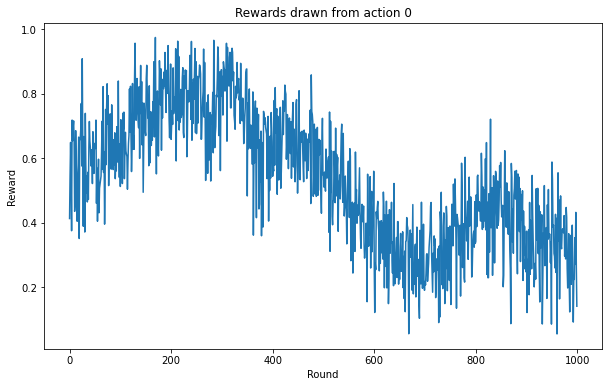

In [6]:
plt.figure(figsize=(10,6))
plt.plot(rewards)
plt.title("Rewards drawn from action 0")
plt.ylabel("Reward")
plt.xlabel("Round")
plt.show()

In [7]:
np.random.seed(1234)
mab = GaussianMAB([(mu,0.1) for mu in np.arange(1,11)*0.1])

In [13]:
alpha = lambda n: 1/n
steps = 1000
eps0 = []
eps01 = []
eps001 = []
ucb1 = []
ucb_dn = []
ucb_dn2 = []
ucb_sn = []
exp3_1 = []
exp3_2 = []
exp3_3 = []
exp3_4 = []
exp3_5 = []
exp3_6 = []
exp3_alt1 = []
exp3_s_graves1 = []
for _ in range(100):
  eps0 += [run(mab, policy=epsilonGreedy, steps = steps, epsilon=0.0, alpha=alpha)]
  eps01 += [run(mab, policy=epsilonGreedy, steps = steps, epsilon=0.1, alpha=alpha)]
  eps001 += [run(mab, policy=epsilonGreedy, steps = steps, epsilon=0.01, alpha=alpha)]
  ucb1 += [run(mab, policy=ucb, steps = steps, delta=lambda n: 1/n)]
  ucb_dn += [run(mab, policy=ucb, steps = steps, delta=lambda n: 1/steps)]
  ucb_dn2 += [run(mab, policy=ucb, steps = steps, delta=lambda n: 1/steps**2)]
  ucb_sn += [run(mab, policy=ucb_slivkins_upfal, steps = steps)]
  exp3_1 += [run(mab, policy=exp3_loss_est, steps = steps, gamma=0.01)]
  exp3_2 += [run(mab, policy=exp3_loss_est, steps = steps, gamma=0.05)]
  exp3_3 += [run(mab, policy=exp3_loss_est, steps = steps, gamma=0.08)]
  exp3_4 += [run(mab, policy=exp3_loss_est, steps = steps, gamma=0.1)]
  exp3_5 += [run(mab, policy=exp3_loss_est, steps = steps, gamma=0.15)]
  exp3_6 += [run(mab, policy=exp3_loss_est, steps = steps, gamma=0.2)]
  #exp3_alt1 += [run(mab, policy=exp3, steps = steps, gamma=0.2)]
  #exp3_s_graves1 += [run(mab, policy=exp3_s, steps = steps, eta=0.05, beta=0, epsilon=0.05)]
eps0 = np.array(eps0)
eps01 = np.array(eps01)
eps001 = np.array(eps001)
ucb1 = np.array(ucb1)
ucb_dn = np.array(ucb_dn)
ucb_dn2 = np.array(ucb_dn2)
ucb_sn = np.array(ucb_sn)
exp3_1 = np.array(exp3_1)
exp3_2 = np.array(exp3_2)
exp3_3 = np.array(exp3_3)
exp3_4 = np.array(exp3_4)
exp3_5 = np.array(exp3_5)
exp3_6 = np.array(exp3_6)
exp3_alt1 = np.array(exp3_alt1)
exp3_s_graves1 = np.array(exp3_s_graves1)

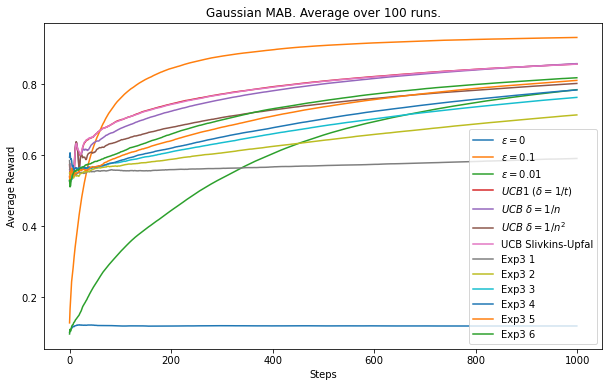

In [15]:
plt.figure(figsize=(10,6))
# Plot the average rewards
plt.plot(eps0[:,:,2].mean(axis=0),label="$\epsilon=0$")
plt.plot(eps01[:,:,2].mean(axis=0),label="$\epsilon=0.1$")
plt.plot(eps001[:,:,2].mean(axis=0),label="$\epsilon=0.01$")
plt.plot(ucb1[:,:,2].mean(axis=0),label="$UCB1\ (\\delta=1/t)$")
plt.plot(ucb_dn[:,:,2].mean(axis=0),label="$UCB\ \\delta=1/n$")
plt.plot(ucb_dn2[:,:,2].mean(axis=0),label="$UCB\ \\delta=1/n^2$")
plt.plot(ucb_sn[:,:,2].mean(axis=0),label="UCB Slivkins-Upfal")
plt.plot(exp3_1[:,:,2].mean(axis=0),label="Exp3 1")
plt.plot(exp3_2[:,:,2].mean(axis=0),label="Exp3 2")
plt.plot(exp3_3[:,:,2].mean(axis=0),label="Exp3 3")
plt.plot(exp3_4[:,:,2].mean(axis=0),label="Exp3 4")
plt.plot(exp3_5[:,:,2].mean(axis=0),label="Exp3 5")
plt.plot(exp3_6[:,:,2].mean(axis=0),label="Exp3 6")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Gaussian MAB. Average over 100 runs.")
plt.show()

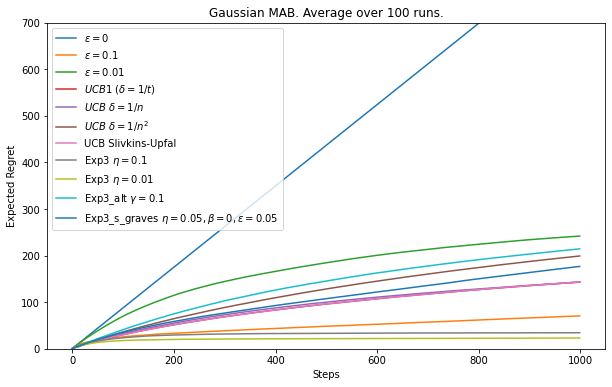

In [87]:
plt.figure(figsize=(10,6))
# Plot the average rewards
plt.plot(eps0[:,:,5].mean(axis=0),label="$\epsilon=0$")
plt.plot(eps01[:,:,5].mean(axis=0),label="$\epsilon=0.1$")
plt.plot(eps001[:,:,5].mean(axis=0),label="$\epsilon=0.01$")
plt.plot(ucb1[:,:,5].mean(axis=0),label="$UCB1\ (\\delta=1/t)$")
plt.plot(ucb_dn[:,:,5].mean(axis=0),label="$UCB\ \\delta=1/n$")
plt.plot(ucb_dn2[:,:,5].mean(axis=0),label="$UCB\ \\delta=1/n^2$")
plt.plot(ucb_sn[:,:,5].mean(axis=0),label="UCB Slivkins-Upfal")
plt.plot(exp3_1[:,:,5].mean(axis=0),label="Exp3 $\\eta=0.1$")
plt.plot(exp3_2[:,:,5].mean(axis=0),label="Exp3 $\\eta=0.01$")
plt.plot(exp3_alt1[:,:,5].mean(axis=0),label="Exp3_alt $\\gamma=0.2$")
plt.plot(exp3_s_graves1[:,:,5].mean(axis=0),label="Exp3_s_graves $\\eta=0.05, \\beta=0, \\epsilon=0.05$")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Expected Regret")
plt.title("Gaussian MAB. Average over 100 runs.")
plt.ylim(0,700)
plt.show()

In [88]:
np.random.seed(1234)
mab = NonStationaryTruncatedGaussianMAB([(0.5,0.1)]*10)

In [89]:
alpha = lambda n: 1/n
steps = 1000
eps0 = []
eps01 = []
eps001 = []
ucb1 = []
ucb_dn = []
ucb_dn2 = []
ucb_sn = []
exp3_1 = []
exp3_2 = []
exp3_alt1 = []
exp3_s_graves1 = []
for _ in range(100):
  eps0 += [run(mab, policy=epsilonGreedy, steps = steps, epsilon=0.0, alpha=alpha)]
  eps01 += [run(mab, policy=epsilonGreedy, steps = steps, epsilon=0.1, alpha=alpha)]
  eps001 += [run(mab, policy=epsilonGreedy, steps = steps, epsilon=0.01, alpha=alpha)]
  ucb1 += [run(mab, policy=ucb, steps = steps, delta=lambda n: 1/n)]
  ucb_dn += [run(mab, policy=ucb, steps = steps, delta=lambda n: 1/steps)]
  ucb_dn2 += [run(mab, policy=ucb, steps = steps, delta=lambda n: 1/steps**2)]
  ucb_sn += [run(mab, policy=ucb_slivkins_upfal, steps = steps, delta=lambda n: 1/n)]
  exp3_1 += [run(mab, policy=exp3, steps = steps, eta=0.1)]
  exp3_2 += [run(mab, policy=exp3, steps = steps, eta=0.2)] 
  exp3_alt1 += [run(mab, policy=exp3_alt, steps = steps, gamma=0.1)]
  exp3_s_graves1 += [run(mab, policy=exp3_s_graves, steps = steps, eta=0.05, beta=0, epsilon=0.05)]
eps0 = np.array(eps0)
eps01 = np.array(eps01)
eps001 = np.array(eps001)
ucb1 = np.array(ucb1)
ucb_dn = np.array(ucb_dn)
ucb_dn2 = np.array(ucb_dn2)
ucb_sn = np.array(ucb_sn)
exp3_1 = np.array(exp3_1)
exp3_2 = np.array(exp3_2)
exp3_alt1 = np.array(exp3_alt1)
exp3_s_graves1 = np.array(exp3_s_graves1)

/home/mike/anaconda3/envs/dev37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/home/mike/anaconda3/envs/dev37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


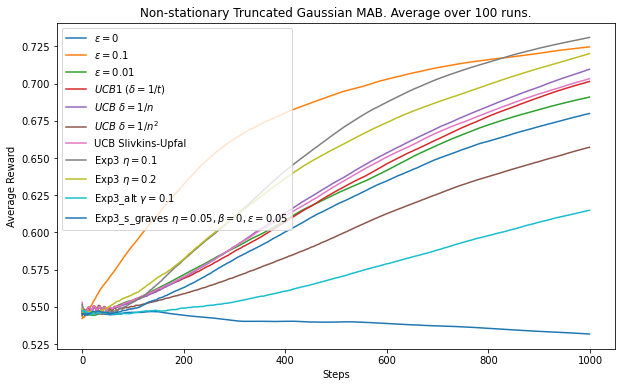

In [92]:
plt.figure(figsize=(10,6))
# Plot the average rewards
plt.plot(eps0[:,:,2].mean(axis=0),label="$\epsilon=0$")
plt.plot(eps01[:,:,2].mean(axis=0),label="$\epsilon=0.1$")
plt.plot(eps001[:,:,2].mean(axis=0),label="$\epsilon=0.01$")
plt.plot(ucb1[:,:,2].mean(axis=0),label="$UCB1\ (\\delta=1/t)$")
plt.plot(ucb_dn[:,:,2].mean(axis=0),label="$UCB\ \\delta=1/n$")
plt.plot(ucb_dn2[:,:,2].mean(axis=0),label="$UCB\ \\delta=1/n^2$")
plt.plot(ucb_sn[:,:,2].mean(axis=0),label="UCB Slivkins-Upfal")
plt.plot(exp3_1[:,:,2].mean(axis=0),label="Exp3 $\\eta=0.1$")
plt.plot(exp3_2[:,:,2].mean(axis=0),label="Exp3 $\\eta=0.2$")
plt.plot(exp3_alt1[:,:,2].mean(axis=0),label="Exp3_alt $\\gamma=0.1$")
plt.plot(exp3_s_graves1[:,:,2].mean(axis=0),label="Exp3_s_graves $\\eta=0.05, \\beta=0, \\epsilon=0.05$")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Non-stationary Truncated Gaussian MAB. Average over 100 runs.")
plt.show()

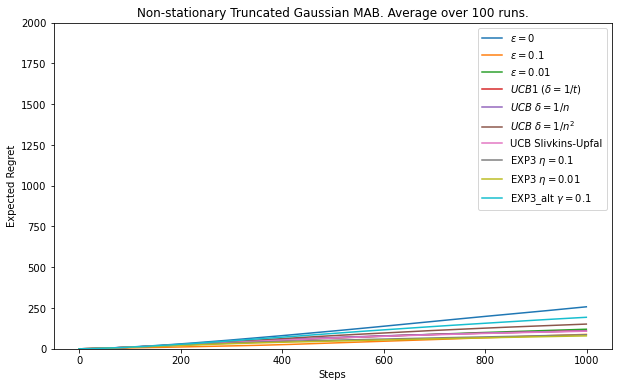

In [31]:
plt.figure(figsize=(10,6))
# Plot the average rewards
plt.plot(eps0[:,:,5].mean(axis=0),label="$\epsilon=0$")
plt.plot(eps01[:,:,5].mean(axis=0),label="$\epsilon=0.1$")
plt.plot(eps001[:,:,5].mean(axis=0),label="$\epsilon=0.01$")
plt.plot(ucb1[:,:,5].mean(axis=0),label="$UCB1\ (\\delta=1/t)$")
plt.plot(ucb_dn[:,:,5].mean(axis=0),label="$UCB\ \\delta=1/n$")
plt.plot(ucb_dn2[:,:,5].mean(axis=0),label="$UCB\ \\delta=1/n^2$")
plt.plot(ucb_sn[:,:,5].mean(axis=0),label="UCB Slivkins-Upfal")
plt.plot(exp3_1[:,:,5].mean(axis=0),label="Exp3 $\\eta=0.1$")
plt.plot(exp3_2[:,:,5].mean(axis=0),label="Exp3 $\\eta=0.2$")
plt.plot(exp3_alt1[:,:,5].mean(axis=0),label="Exp3_alt $\\gamma=0.1$")
plt.plot(exp3_s_graves1[:,:,5].mean(axis=0),label="Exp3_s_graves $\\eta=0.05, \\beta=0, \\epsilon=0.05$")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Expected Regret")
plt.title("Non-stationary Truncated Gaussian MAB. Average over 100 runs.")
plt.ylim(0,2000)
plt.show()

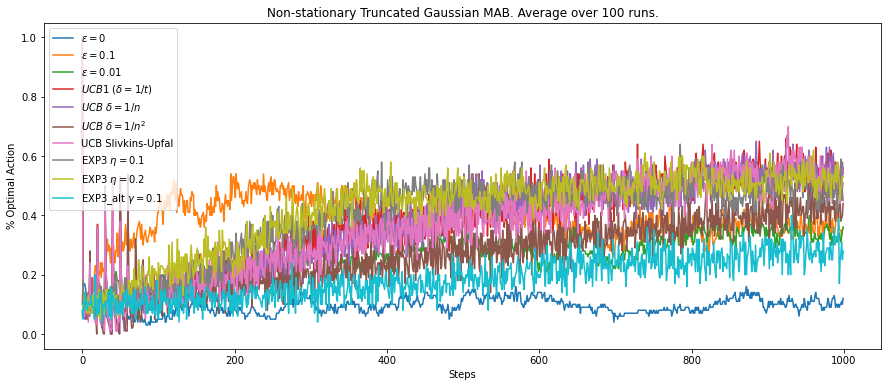

In [32]:
plt.figure(figsize=(15,6))
plt.plot((eps0[:,:,0]==eps0[:,:,3]).mean(axis=0),label="$\epsilon=0$")
plt.plot((eps01[:,:,0]==eps01[:,:,3]).mean(axis=0),label="$\epsilon=0.1$")
plt.plot((eps001[:,:,0]==eps001[:,:,3]).mean(axis=0),label="$\epsilon=0.01$")
plt.plot((ucb1[:,:,0]==ucb1[:,:,3]).mean(axis=0),label="$UCB1\ (\\delta=1/t)$")
plt.plot((ucb_dn[:,:,0]==ucb_dn[:,:,3]).mean(axis=0),label="$UCB\ \\delta=1/n$")
plt.plot((ucb_dn2[:,:,0]==ucb_dn2[:,:,3]).mean(axis=0),label="$UCB\ \\delta=1/n^2$")
plt.plot((ucb_sn[:,:,0]==ucb_sn[:,:,3]).mean(axis=0),label="UCB Slivkins-Upfal")
plt.plot((exp3_1[:,:,0]==exp3_1[:,:,3]).mean(axis=0),label="EXP3 $\\eta=0.1$")
plt.plot((exp3_2[:,:,0]==exp3_2[:,:,3]).mean(axis=0),label="EXP3 $\\eta=0.2$")
plt.plot((exp3_alt1[:,:,0]==exp3_alt1[:,:,3]).mean(axis=0),label="EXP3_alt $\\gamma=0.1$")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.title("Non-stationary Truncated Gaussian MAB. Average over 100 runs.")
plt.show()